3. Create new data - date
4. Data visualization
5. Convert data
6. Create Good CV
7. Modeling

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Data-walkthrough" data-toc-modified-id="Data-walkthrough-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Data walkthrough</a></span></li></ul></li></ul></li><li><span><a href="#Helpers-functions" data-toc-modified-id="Helpers-functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Helpers functions</a></span></li><li><span><a href="#Create-data-from-date-columns" data-toc-modified-id="Create-data-from-date-columns-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create data from date columns</a></span></li><li><span><a href="#Convert-data-ready-for-modeling" data-toc-modified-id="Convert-data-ready-for-modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Convert data ready for modeling</a></span></li><li><span><a href="#Base-models" data-toc-modified-id="Base-models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Base models</a></span><ul class="toc-item"><li><span><a href="#With-fatsai-lib" data-toc-modified-id="With-fatsai-lib-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>With fatsai lib</a></span></li></ul></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Visualization</a></span><ul class="toc-item"><li><span><a href="#Revenue" data-toc-modified-id="Revenue-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Revenue</a></span></li><li><span><a href="#Skewness-and-Kutorsis" data-toc-modified-id="Skewness-and-Kutorsis-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Skewness and Kutorsis</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Skewness" data-toc-modified-id="Skewness-6.2.0.1"><span class="toc-item-num">6.2.0.1&nbsp;&nbsp;</span>Skewness</a></span></li><li><span><a href="#Kurtosis" data-toc-modified-id="Kurtosis-6.2.0.2"><span class="toc-item-num">6.2.0.2&nbsp;&nbsp;</span>Kurtosis</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Date-vs-buy" data-toc-modified-id="Date-vs-buy-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Date vs buy</a></span><ul class="toc-item"><li><span><a href="#Channelgrouping" data-toc-modified-id="Channelgrouping-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Channelgrouping</a></span></li><li><span><a href="#device_browser" data-toc-modified-id="device_browser-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>device_browser</a></span></li><li><span><a href="#Some-ids-columns" data-toc-modified-id="Some-ids-columns-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Some ids columns</a></span></li></ul></li></ul></div>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor as RFF

from pprint import pprint
import math

from scipy.stats import kurtosis, skew

In [2]:
plt.rcParams["figure.figsize"] = (15,6)

In [3]:
import sys
sys.path.append('..')

from fastai.structured import *

In [4]:
df_raw = pd.read_csv('../data/train_.csv',nrows=None,
                    dtype={'fullVisitorId': str},
                    parse_dates=['date'])

In [5]:
df_raw.head()

,Unnamed: 0,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device_browser,device_deviceCategory,...,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_transactionRevenue,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source
0,0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,desktop,...,1,1,1,1,0.0,False,NaN,organic,NaN,google
1,1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,desktop,...,1,1,1,1,0.0,False,NaN,organic,NaN,google
2,2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,desktop,...,1,1,1,1,0.0,False,NaN,organic,NaN,google
3,3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,desktop,...,1,1,1,1,0.0,False,google + online,organic,NaN,google
4,4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,mobile,...,1,1,0,1,0.0,True,NaN,organic,NaN,google


In [6]:
df_raw.columns

Index(['Unnamed: 0', 'channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'visitId', 'visitNumber', 'visitStartTime', 'device_browser',
       'device_deviceCategory', 'device_isMobile', 'device_operatingSystem',
       'geoNetwork_city', 'geoNetwork_continent', 'geoNetwork_country',
       'geoNetwork_metro', 'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent', 'totals_bounces', 'totals_hits',
       'totals_newVisits', 'totals_pageviews', 'totals_transactionRevenue',
       'trafficSource_isTrueDirect', 'trafficSource_keyword',
       'trafficSource_medium', 'trafficSource_referralPath',
       'trafficSource_source'],
      dtype='object')

In [7]:
del df_raw['Unnamed: 0']

In [8]:
df_raw.shape

(903653, 28)

In [9]:
df_raw.rename(columns={'totals_transactionRevenue':'Revenue'},inplace=True)
df_raw.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'device_browser',
       'device_deviceCategory', 'device_isMobile', 'device_operatingSystem',
       'geoNetwork_city', 'geoNetwork_continent', 'geoNetwork_country',
       'geoNetwork_metro', 'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent', 'totals_bounces', 'totals_hits',
       'totals_newVisits', 'totals_pageviews', 'Revenue',
       'trafficSource_isTrueDirect', 'trafficSource_keyword',
       'trafficSource_medium', 'trafficSource_referralPath',
       'trafficSource_source'],
      dtype='object')

### Data walkthrough

In [10]:
df_raw.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device_browser,device_deviceCategory,device_isMobile,...,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,Revenue,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,desktop,False,...,1,1,1,1,0.0,False,NaN,organic,NaN,google
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,desktop,False,...,1,1,1,1,0.0,False,NaN,organic,NaN,google
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,desktop,False,...,1,1,1,1,0.0,False,NaN,organic,NaN,google
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,desktop,False,...,1,1,1,1,0.0,False,google + online,organic,NaN,google
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,mobile,True,...,1,1,0,1,0.0,True,NaN,organic,NaN,google


In [11]:
df_raw.describe(include='all')

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device_browser,device_deviceCategory,device_isMobile,...,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,Revenue,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source
count,903653,903653,903653,903653,9.036530e+05,903653.000000,9.036530e+05,903653,903653,903653,...,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653,34361,903653,330941,903653
unique,8,366,714167,902755,NaN,NaN,NaN,54,3,2,...,NaN,NaN,NaN,NaN,NaN,2,3658,7,1475,380
top,Organic Search,2016-11-28 00:00:00,1957458976293878100,4142589460378678240_1495348223,NaN,NaN,NaN,Chrome,desktop,False,...,NaN,NaN,NaN,NaN,NaN,False,6qEhsCssdK0z36ri,organic,/,google
freq,381561,4807,278,2,NaN,NaN,NaN,620364,664479,664530,...,NaN,NaN,NaN,NaN,NaN,629648,11503,381561,75523,400788
first,NaN,2016-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.485007e+09,2.264897,1.485007e+09,NaN,NaN,NaN,...,0.498676,4.596538,0.778020,3.849338,0.227118,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,9.022124e+06,9.283735,9.022124e+06,NaN,NaN,NaN,...,0.499999,9.641437,0.415578,7.025002,2.003710,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.470035e+09,1.000000,1.470035e+09,NaN,NaN,NaN,...,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.477561e+09,1.000000,1.477561e+09,NaN,NaN,NaN,...,0.000000,1.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN


In [12]:
df_raw.isnull().sum().sort_values(ascending=False)

trafficSource_keyword         869292
geoNetwork_metro              709995
trafficSource_referralPath    572712
geoNetwork_city               508229
geoNetwork_region             508229
geoNetwork_networkDomain      146034
device_browser                     0
device_isMobile                    0
device_deviceCategory              0
trafficSource_source               0
device_operatingSystem             0
visitNumber                        0
visitId                            0
sessionId                          0
fullVisitorId                      0
date                               0
visitStartTime                     0
geoNetwork_country                 0
geoNetwork_continent               0
geoNetwork_subContinent            0
totals_bounces                     0
totals_hits                        0
totals_newVisits                   0
totals_pageviews                   0
Revenue                            0
trafficSource_isTrueDirect         0
trafficSource_medium               0
c

In [13]:
df_raw.shape

(903653, 28)

# Helpers functions

In [14]:
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = {'rmse_train':rmse(m.predict(X_train), y_train), 'rmse_valid':rmse(m.predict(X_valid), y_valid),
                'r2_train':m.score(X_train, y_train), 'r2_valid':m.score(X_valid, y_valid)}
    if hasattr(m, 'oob_score_'): res['r2_oob']= m.oob_score_
    pprint(res)

In [15]:
def base_model(oob_score=True):
    global clf
    clf = RFF(n_jobs=-1,n_estimators=20,oob_score=oob_score)
    clf.fit(X_train, y_train)
    print_score(clf)

In [16]:
n_trn = 70000

def split_vals(a,n) : return a[:n],a[n:]

def split_data(df = df_raw,n_trn = 70000,to_keep=None):
    global X_train,X_valid,y_train,y_valid
    
    X_train,X_valid = split_vals(df.drop('Revenue',axis=1), n_trn)
    y_train,y_valid = split_vals(df['Revenue'], n_trn)
    
    

In [17]:
def plot_fi(n=30): 
    cols = list(df_raw.columns)
    cols.remove('Revenue')
    fi = pd.DataFrame({'cols':cols,'imp':clf.feature_importances_}).sort_values('imp',ascending=False).iloc[:n]
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

# Create data from date columns

In [18]:
fld = pd.to_datetime(df_raw['date'], infer_datetime_format=True)

In [19]:
attrs = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
        'Is_month_end', 'Is_month_start', 'Is_quarter_end', 
        'Is_quarter_start', 'Is_year_end', 'Is_year_start']

In [20]:
for attr in attrs:
    df_raw['Date_'+attr] = getattr(fld.dt,attr.lower())
    

In [21]:
#del df_raw['date']
del fld

In [22]:
df_raw.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'device_browser',
       'device_deviceCategory', 'device_isMobile', 'device_operatingSystem',
       'geoNetwork_city', 'geoNetwork_continent', 'geoNetwork_country',
       'geoNetwork_metro', 'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent', 'totals_bounces', 'totals_hits',
       'totals_newVisits', 'totals_pageviews', 'Revenue',
       'trafficSource_isTrueDirect', 'trafficSource_keyword',
       'trafficSource_medium', 'trafficSource_referralPath',
       'trafficSource_source', 'Date_Year', 'Date_Month', 'Date_Week',
       'Date_Day', 'Date_Dayofweek', 'Date_Dayofyear', 'Date_Is_month_end',
       'Date_Is_month_start', 'Date_Is_quarter_end', 'Date_Is_quarter_start',
       'Date_Is_year_end', 'Date_Is_year_start'],
      dtype='object')

# Convert data ready for modeling

In [23]:
df = df_raw.copy()
df.fillna('NA',inplace=True)

In [24]:
id_cols = ['fullVisitorId','sessionId','visitId']
cat_cols = ['channelGrouping','device_browser','device_deviceCategory','device_operatingSystem','geoNetwork_city',
           'geoNetwork_continent','geoNetwork_country','geoNetwork_metro','geoNetwork_networkDomain','geoNetwork_region',
           'geoNetwork_subContinent','trafficSource_keyword','trafficSource_medium','trafficSource_referralPath',
           'trafficSource_source']
num_cols = ['visitNumber','visitNumber','totals_bounces','totals_hits','totals_newVisits','totals_pageviews']
date_cols = ['date','visitStartTime']
bool_cols = ['device_isMobile','trafficSource_isTrueDirect']

In [25]:

for col in cat_cols:
    print(col)
    lb = LabelEncoder() 
    lb.fit(df[col])
    df[col] = lb.transform(df[col])
    
    

channelGrouping
device_browser
device_deviceCategory
device_operatingSystem
geoNetwork_city
geoNetwork_continent
geoNetwork_country
geoNetwork_metro
geoNetwork_networkDomain
geoNetwork_region
geoNetwork_subContinent
trafficSource_keyword
trafficSource_medium
trafficSource_referralPath
trafficSource_source


# Base models

In [26]:
df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'device_browser',
       'device_deviceCategory', 'device_isMobile', 'device_operatingSystem',
       'geoNetwork_city', 'geoNetwork_continent', 'geoNetwork_country',
       'geoNetwork_metro', 'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent', 'totals_bounces', 'totals_hits',
       'totals_newVisits', 'totals_pageviews', 'Revenue',
       'trafficSource_isTrueDirect', 'trafficSource_keyword',
       'trafficSource_medium', 'trafficSource_referralPath',
       'trafficSource_source', 'Date_Year', 'Date_Month', 'Date_Week',
       'Date_Day', 'Date_Dayofweek', 'Date_Dayofyear', 'Date_Is_month_end',
       'Date_Is_month_start', 'Date_Is_quarter_end', 'Date_Is_quarter_start',
       'Date_Is_year_end', 'Date_Is_year_start'],
      dtype='object')

In [27]:
split_data(df)

In [28]:
base_model()

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [ ]:
plot_fi(n=30)

## With fatsai lib

In [ ]:
df_raw.columns

In [ ]:
add_datepart(df_raw,'date')

In [ ]:
train_cats(df_raw)

In [ ]:
df_trn ,y_trn, nas = proc_df(df_raw,'totals_transactionRevenue')

In [ ]:
n_trn = 80000
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [ ]:
base_model()

# Visualization 

In [29]:
df_raw.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device_browser,device_deviceCategory,device_isMobile,...,Date_Week,Date_Day,Date_Dayofweek,Date_Dayofyear,Date_Is_month_end,Date_Is_month_start,Date_Is_quarter_end,Date_Is_quarter_start,Date_Is_year_end,Date_Is_year_start
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,desktop,False,...,35,2,4,246,False,False,False,False,False,False
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,desktop,False,...,35,2,4,246,False,False,False,False,False,False
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,desktop,False,...,35,2,4,246,False,False,False,False,False,False
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,desktop,False,...,35,2,4,246,False,False,False,False,False,False
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,mobile,True,...,35,2,4,246,False,False,False,False,False,False


## Revenue

In [30]:
df_buy = df_raw[df_raw['Revenue'] >0]
df_nonbuy = df_raw[~ (df_raw['Revenue'] >0)]

/Users/qnkhuat/miniconda2/envs/dev/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Revenue Value Distribution')

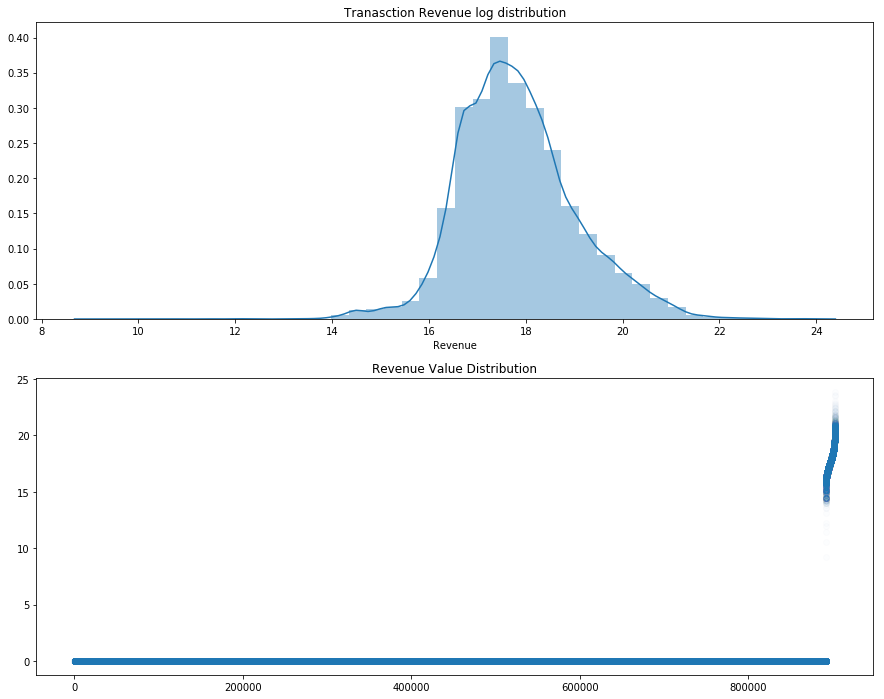

In [31]:
#df_raw.Revenue.hist(log=True)
plt.figure(figsize=(15,12))
plt.subplot(211)
sns.distplot(df_buy['Revenue'],bins=40, kde=True)
plt.title("Tranasction Revenue log distribution")

plt.subplot(212)
plt.scatter(range(df_raw.shape[0]), np.sort(df_raw['Revenue'].values),alpha=.01)
plt.title("Revenue Value Distribution")

Revenue through time

Seems like at chrismas people buy alot

## Skewness and Kutorsis

I will see the kurtosis and Skewness of Transaction Revenue
Skew and Kurtosis: 2 Important Statistics terms you need to know

#### Skewness
It is the degree of distortion from the symmetrical bell curve or the normal distribution. It measures the lack of symmetry in data distribution.
It differentiates extreme values in one versus the other tail. A symmetrical distribution will have a skewness of 0.

Positive Skewness means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.
Negative Skewness is when the tail of the left side of the distribution is longer or fatter than the tail on the right side. The mean and median will be less than the mode.

##### So, when is the skewness too much?
The rule of thumb seems to be:
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. 
If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.
If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.

#### Kurtosis
Kurtosis is all about the tails of the distribution — not the peakedness or flatness. It is used to describe the extreme values in one versus the other tail. 
It is actually the measure of outliers present in the distribution.

High kurtosis in a data set is an indicator that data has heavy tails or outliers. If there is a high kurtosis, then, we need to investigate why do we have so many outliers. It indicates a lot of things, maybe wrong data entry or other things. Investigate! 
Low kurtosis in a data set is an indicator that data has light tails or lack of outliers. If we get low kurtosis(too good to be true), then also we need to investigate and trim the dataset of unwanted results

In [25]:
print( 'Skewness of normal distribution (should be 0): {}'.format(
    skew((df_buy["Revenue"]))))

print('Excess kurtosis of normal distribution (should be 0): {}'.format(
    kurtosis(df_buy["Revenue"])))


Skewness of normal distribution (should be 0): 0.3375230660214664
Excess kurtosis of normal distribution (should be 0): 1.1610188903215404


So our kurtorsis is high. That means we have much outliers

In [44]:
def CalcOutliers(df_num): 
    '''
    Leonardo Ferreira 20/10/2018
    Set a numerical value and it will calculate the upper, lower and total number of outliers
    It will print a lot of statistics of the numerical feature that you set on input
    '''
    
    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    print('Upper bound ',upper)
    print('Lower bound',lower)
    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Identified outliers: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    
    return lower,upper


In [106]:
lower,upper = CalcOutliers(df_buy['Revenue']) # Call 

Upper bound  21.430687079452024
Lower bound 14.216037526519058
Identified lowest outliers: 17
Identified upper outliers: 45
Identified outliers: 62
Non-outlier observations: 11453
Total percentual of Outliers:  0.5413


Exclude all outliers rows

In [131]:
df_non_outliers = df_buy[(df_buy['Revenue']>lower) & (df_buy['Revenue'] <upper)].copy()

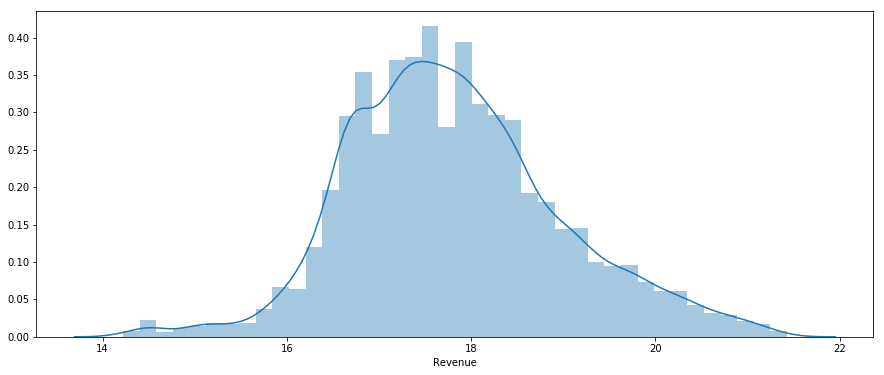

In [132]:
sns.distplot(df_non_outliers['Revenue'],bins=40)

In [134]:
print( 'Skewness of normal distribution (should be 0): {}'.format(
    skew((df_non_outliers["Revenue"]))))

print('Excess kurtosis of normal distribution (should be 0): {}'.format(
    kurtosis(df_non_outliers["Revenue"])))



Skewness of normal distribution (should be 0): 0.33183316403720425
Excess kurtosis of normal distribution (should be 0): 0.3068950790692586


much better huh

totals_pageviews

In [38]:
lower,upper = CalcOutliers(df_raw['totals_pageviews']) # Call 

Upper bound  24.92433243580235
Lower bound -17.22565606334522
Identified lowest outliers: 0
Identified upper outliers: 17511
Identified outliers: 17511
Non-outlier observations: 886142
Total percentual of Outliers:  1.9761


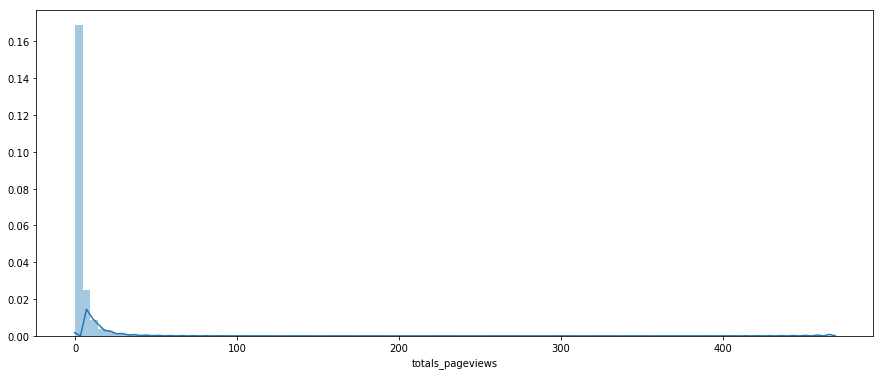

In [41]:
sns.distplot(df_raw['totals_pageviews'],bins=100)

# Date vs buy

In [21]:
df_raw['is_bought'] =  df_raw['Revenue'] > 0

In [22]:
df_2016 = df_raw[df_raw['Date_Year']==2016]
df_2017 = df_raw[df_raw['Date_Year']==2017]

Text(0.5, 1.0, '2017')

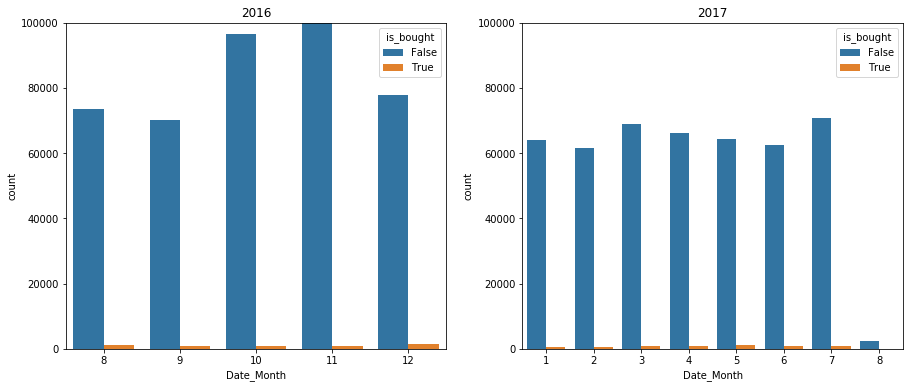

In [23]:

plt.figure(figsize=(15,6))


ax1 = plt.subplot(121)
sns.countplot('Date_Month',hue='is_bought',data=df_2016,log=False,ax=ax1)
ax1.set_ylim([0,10e4])
plt.title('2016')


ax2 = plt.subplot(122)
sns.countplot('Date_Month',hue='is_bought',data=df_2017,log=False,ax=ax2)
ax2.set_ylim([0,10e4])
plt.title('2017')

There are 8,9,10,11,12 of 2016 and 1,2,3,4,5,6,7,8 of 2017

In which 8-2017 is very little so we can consider this as a full length of a year

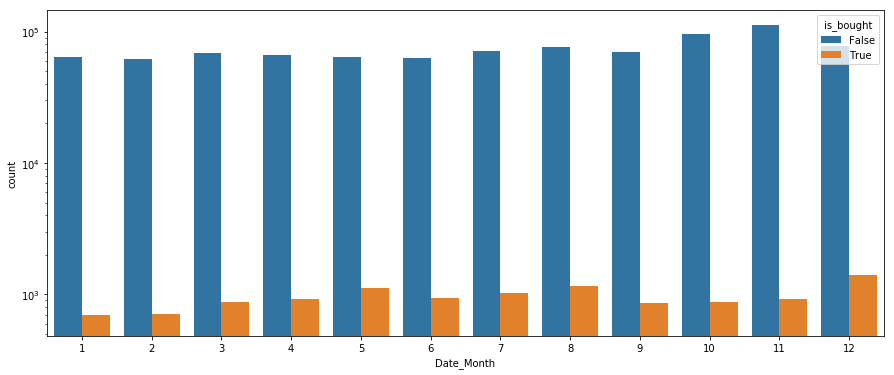

In [24]:
sns.countplot('Date_Month',hue='is_bought',data=df_raw,log=True)

Text(0.5, 1.0, 'Sum Revenue through Month')

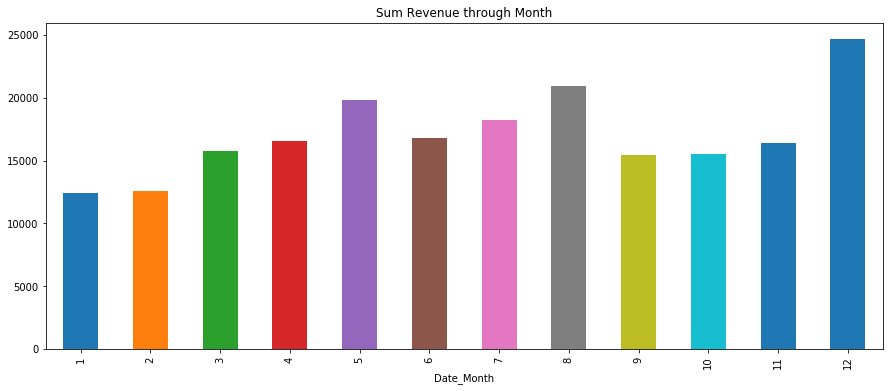

In [94]:
df_raw.groupby('Date_Month').Revenue.sum().plot(kind='bar')
plt.title("Sum Revenue through Month")

Text(0.5, 1.0, 'Sum Revenue through time')

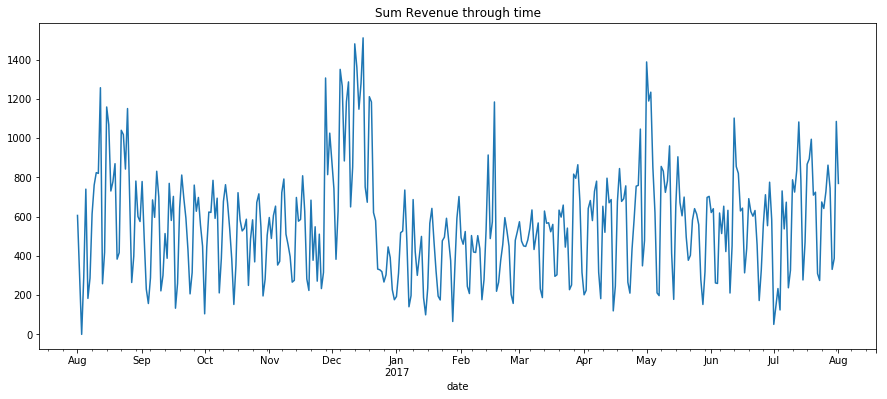

In [95]:
df_raw.groupby('date').Revenue.sum().plot()
plt.title("Sum Revenue through time")

There is slightly increase at the end of the yearm

In [50]:
def analytic_revenue(df,col,n=10):
    plt.subplot(131)
    df.groupby(col).Revenue.count().sort_values(ascending=False)[:n].plot(kind='bar')
    plt.title(f'{col} - count revenue')
    
    plt.subplot(132)
    df.groupby(col).Revenue.sum().sort_values(ascending=False)[:n].plot(kind='bar')
    plt.title(f'{col} - sum revenue')
    
    plt.subplot(133)
    df[df.Revenue>0].groupby(col).Revenue.mean().sort_values(ascending=False)[:n].plot(kind='bar')
    plt.title(f'{col} - mean revenue') 
    

## Channelgrouping

Quick look at the distribution of bought user

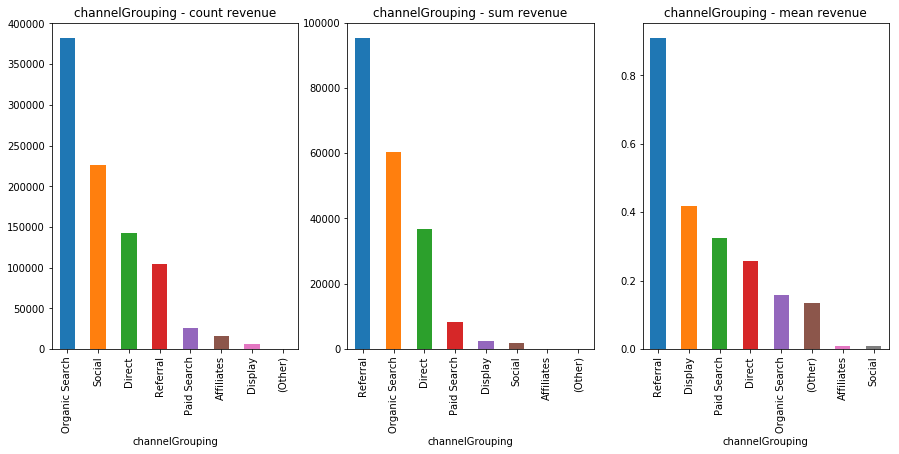

In [49]:
analytic_revenue(df_raw,'channelGrouping')

The traffics explain the sum revenue

Referral is the most valuable channel

The mean revenue is the quite the same accross channels



## device_browser

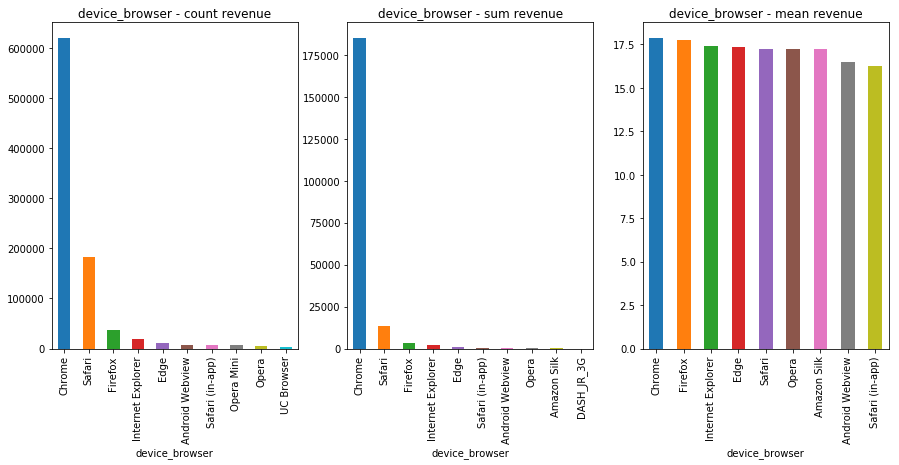

In [51]:
analytic_revenue(df_raw,'device_browser')

## Some ids columns

In [63]:
df_raw[['visitId','fullVisitorId','sessionId',]].head()

,visitId,fullVisitorId,sessionId
0,1472830385,1131660440785968503,1131660440785968503_1472830385
1,1472880147,377306020877927890,377306020877927890_1472880147
2,1472865386,3895546263509774583,3895546263509774583_1472865386
3,1472881213,4763447161404445595,4763447161404445595_1472881213
4,1472822600,27294437909732085,27294437909732085_1472822600


sessonId is just the the combination of visitId and fullVisitorId

In [75]:
print(f"# visitId unique \t{df_raw['visitId'].nunique()}")
print(f"# fullVisitorId unique \t{df_raw['fullVisitorId'].nunique()}")
print(f"# sessionId unique \t{df_raw['sessionId'].nunique()}")
print(f"# data rows \t\t{df_raw.shape[0]}")

# visitId unique 	886303
# fullVisitorId unique 	714167
# sessionId unique 	902755
# data rows 		903653
